# Clustering

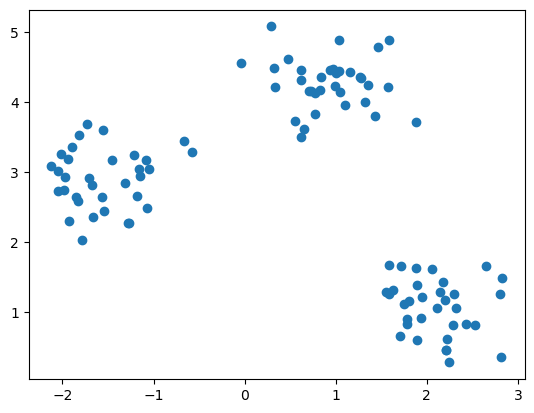

In [8]:
# Generatition de donnees
# Génération de données
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
plt.scatter(X[:,0], X[:,1])

In [13]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(X)
model.predict(X)

c:\Users\bilal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 2, 0, 2, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1, 0, 0, 2,
       2, 2, 0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 0, 0, 2, 0, 0, 1, 1, 1, 1, 0,
       2, 1, 0, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2,
       0, 2, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1])

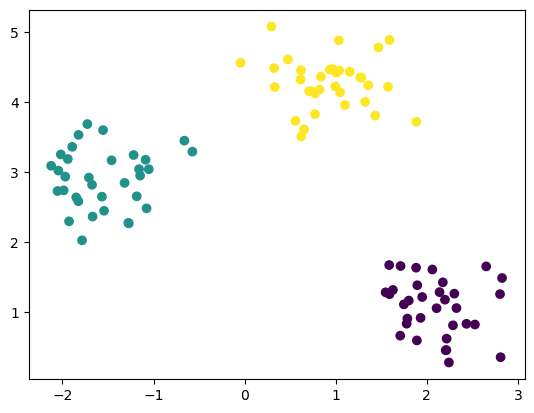

In [14]:
plt.scatter(X[:,0], X[:,1], c=model.predict(X))

30.87053128014068
[0 2 0 2 2 2 1 1 0 2 2 2 0 2 1 0 1 2 1 1 1 1 1 2 0 0 0 0 1 1 2 0 0 2 1 1 2
 0 0 1 1 0 0 2 2 2 0 0 1 1 1 0 2 0 1 1 0 0 2 0 0 1 1 1 1 0 2 1 0 2 1 2 2 0
 0 2 2 2 1 0 2 2 0 2 0 2 2 2 0 2 0 0 1 1 1 1 2 2 1 1]
-30.87053128014067


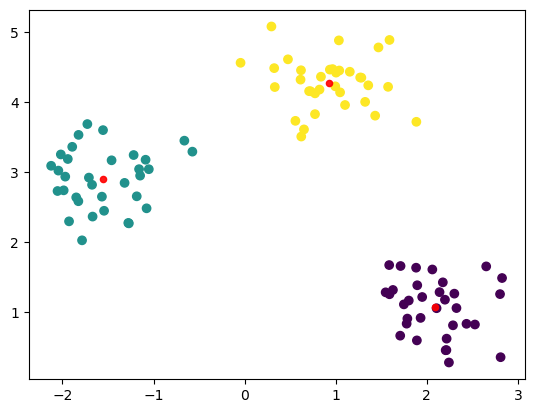

In [28]:
centers = model.cluster_centers_
plt.scatter(X[:,0], X[:,1], c=model.predict(X))
plt.scatter(centers[:,0], centers[:,1], c='red', s=20, alpha=0.9)
# print(centers)
# print(centers[:,0])
# print(centers[:,1])
print(model.inertia_)
print(model.labels_)
print(model.score(X))  # Inertie

c:\Users\bilal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bilal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bilal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bilal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

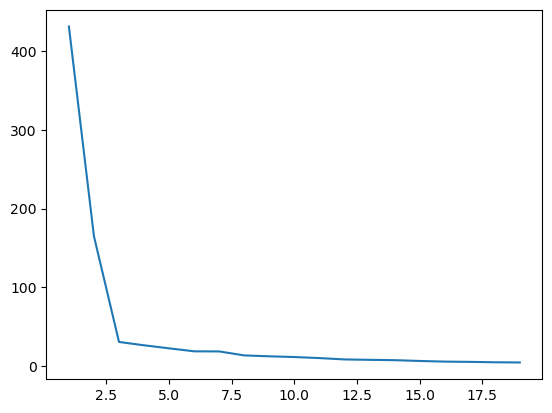

In [29]:
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k)
    model.fit(X)
    model.predict(X)
    inertia.append(model.inertia_)
plt.plot(K_range, inertia)  # Elbow method  

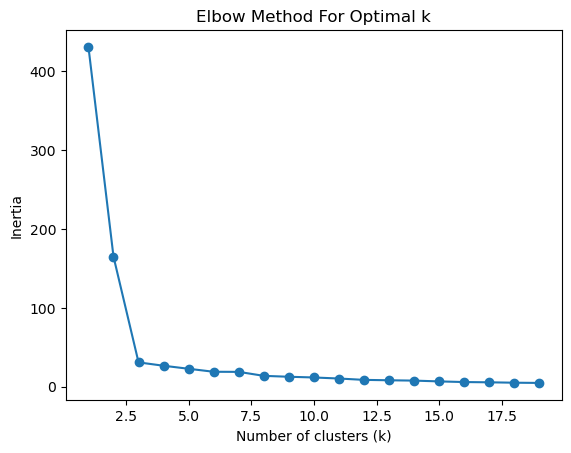

In [30]:
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

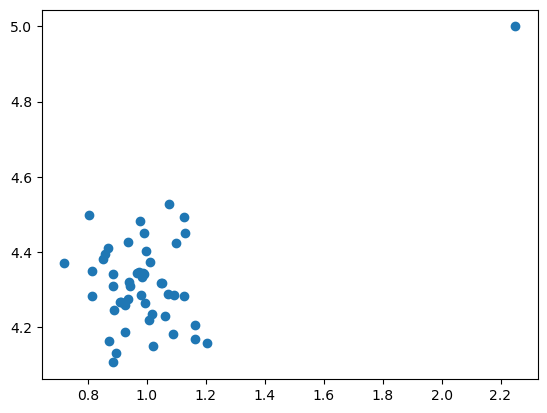

In [46]:
import numpy as np

X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
X[-1,:] = np.array([2.25, 5])

plt.scatter(X[:,0], X[:, 1])
     

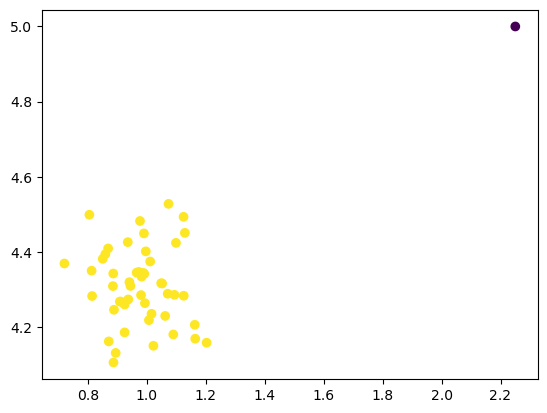

In [47]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.01)
model.fit(X)

plt.scatter(X[:,0], X[:, 1], c=model.predict(X))
     

# Application Decontamination Digist

In [48]:
from sklearn.datasets import load_digits

In [49]:
digits = load_digits()
images = digits.images
X = digits.data
y = digits.target  

print(X.shape)

(1797, 64)


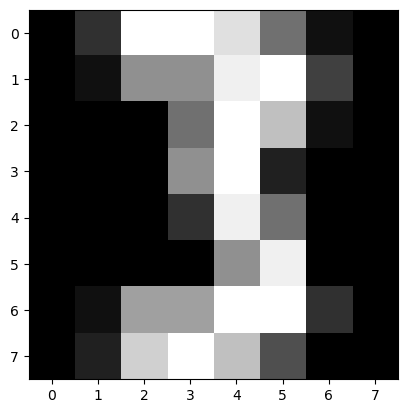

In [52]:
plt.imshow(images[63], cmap='gray')

In [ ]:
model = IsolationForest(contamination=0.02, random_state=0)

In [55]:
model.fit(X)

IsolationForest(contamination=0.02, random_state=0)

In [58]:
# prediction 
outliers = model.predict(X) == -1 # 1 = normal, -1 = abnormal

In [59]:
print(outliers)

[False False False ... False False False]


Text(0.5, 1.0, '2')

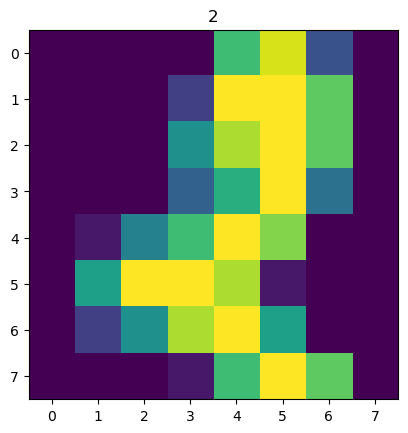

In [62]:
plt.imshow(images[outliers][0])
plt.title(y[outliers][0])